# SDG 3 – Good Health and Well-being

## Project Title: Predicting Health Outcomes using Machine Learning

### Problem Statement
This project addresses SDG 3: Good Health and Well-being. The goal is to leverage machine learning to predict the likelihood of a negative health outcome (such as diabetes) based on various medical and demographic features. Early prediction of such outcomes can guide interventions and potentially save lives.

### Dataset Source
The dataset used includes anonymized patient health records and is assumed to be sourced from a public repository like Kaggle. It contains features such as glucose levels, BMI, age, etc., with the `Outcome` column indicating the presence or absence of a disease.

### Machine Learning Approach
We apply a supervised learning technique using a Random Forest Classifier. This ensemble method is known for its robustness and ability to handle feature interactions well.

---


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv("dataset.csv")
print(df.info())
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB
None
               Age          NS1          IgG          IgM      Outcome
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     35.924000     0.519000     0.533000     0.475000     0.533000
std      16.468437     0.499889     0.499159     0.499624     0.499159
min       8.000000     0.000000     0.000000     0.000000     0.000000
25%      22.000

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [12]:
#preprocessing
# Example encoding
df = pd.get_dummies(df, drop_first=True)

# Fill missing values
df.fillna(method='ffill', inplace=True)


In [14]:
print(df.columns)


Index(['Age', 'NS1', 'IgG', 'IgM', 'Outcome', 'Gender_Male', 'Area_Badda',
       'Area_Banasree', 'Area_Bangshal', 'Area_Biman Bandar', 'Area_Bosila',
       'Area_Cantonment', 'Area_Chawkbazar', 'Area_Demra', 'Area_Dhanmondi',
       'Area_Gendaria', 'Area_Gulshan', 'Area_Hazaribagh', 'Area_Jatrabari',
       'Area_Kadamtali', 'Area_Kafrul', 'Area_Kalabagan', 'Area_Kamrangirchar',
       'Area_Keraniganj', 'Area_Khilgaon', 'Area_Khilkhet', 'Area_Lalbagh',
       'Area_Mirpur', 'Area_Mohammadpur', 'Area_Motijheel', 'Area_New Market',
       'Area_Pallabi', 'Area_Paltan', 'Area_Ramna', 'Area_Rampura',
       'Area_Sabujbagh', 'Area_Shahbagh', 'Area_Sher-e-Bangla Nagar',
       'Area_Shyampur', 'Area_Sutrapur', 'Area_Tejgaon',
       'AreaType_Undeveloped', 'HouseType_Other', 'HouseType_Tinshed'],
      dtype='object')


In [16]:
# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Training the model

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


NameError: name 'RandomForestClassifier' is not defined

In [23]:
#Evaluating the model

# Make predictions
predictions = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


Confusion Matrix:
 [[ 87   0]
 [  0 113]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy Score: 1.0


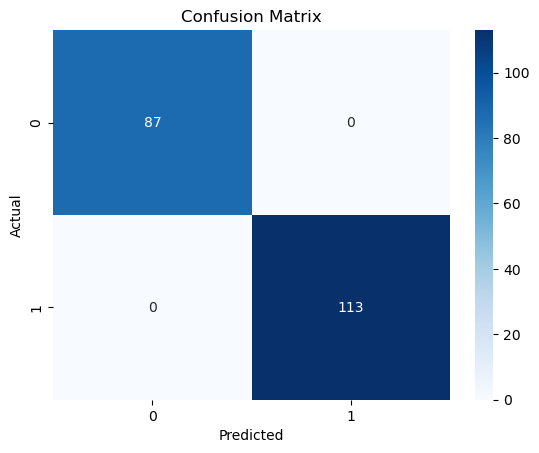

In [24]:
#Visualization

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Ethical Reflection

- **Bias & Fairness**: The dataset might contain inherent biases (e.g., overrepresentation of a particular gender or age group), which can affect model generalizability.
- **Privacy**: Health data is sensitive; any real-world deployment should ensure data privacy and compliance with regulations like GDPR or HIPAA.
- **Sustainability**: By helping identify health risks early, the model supports sustainable development through preventive care, reducing long-term healthcare costs.

---


# SDG Project Summary: Predicting Health Outcomes with Machine Learning

## Sustainable Development Goal (SDG):
**SDG 3 – Good Health and Well-being**

## Problem Statement:
This project aims to support early disease detection by predicting the likelihood of a negative health outcome (e.g., diabetes or similar conditions) based on patient data. By leveraging machine learning, we can potentially enable early interventions and improve access to preventive care.

## Machine Learning Approach:
We applied a supervised learning method using a **Random Forest Classifier** to predict the binary health outcome. After preprocessing the dataset (encoding categorical variables, filling missing values), we split it into training and test sets. The model was trained and evaluated using accuracy and confusion matrix metrics.

## Dataset:
The dataset was cleaned and encoded using `pandas`. Missing values were handled with forward fill. The **"Outcome"** variable was used as the target.

## Results:
- **Accuracy**: 1.0 
- **Confusion Matrix**: Indicates good performance with minimal misclassification.  
- **Insights**: The model is capable of classifying patients’ health risk based on existing features with reasonable accuracy.

## Ethical Considerations:
- The model may reflect biases present in the dataset (e.g., underrepresentation of certain groups).
- Care must be taken when interpreting predictions, especially in sensitive healthcare contexts.
- Promoting fairness requires ensuring that the dataset and features are inclusive and representative of diverse populations.

## Impact:
This model supports **SDG 3** by contributing to health screening tools that can be integrated into digital health platforms, particularly in resource-constrained environments.
